# How can we get more value from our Housing Price Dataset?
Situation: 
- The year is 2017
- You are a data scientist at a company that is selling and buying houses in Melbourne
- You have already done the following:
    1. Gathered all the data for past sales of houses in the Melbourne region
    1. Cleaned this data and put it in a CSV format for storage
    1. Created a dashboard with some stats for the realtors to look at
- Realtors are quite pleased with you!!!
- Realtors are wondering ... if we know the characteristics of a house, can we predict for what price it will sell?? 
- You have learned about Machine Learning models at SpikeUp, and you want to test this!

# How to create a Machine Learning model?
![Image: Steps of creating a ML Model](images/What-is-ML-Model.jpg)

# Introduction
We'll start with an overview of how machine learning models work and how they are used. This may feel basic if you've done statistical modeling or machine learning before. Don't worry, we will progress to building powerful models soon.

In this notebook you will build models as you go through the following scenario:

The realtors predicted real estate values in the past, and they say it is just intuition. But more questioning reveals that they identified price patterns from houses they have seen in the past, and they use those patterns to make predictions for new houses.

Machine learning works the same way. We'll start with a model called the Decision Tree. There are fancier models that give more accurate predictions. But decision trees are easy to understand, and they are the basic building block for some of the best models in data science.

For simplicity, we'll start with the simplest possible decision tree.

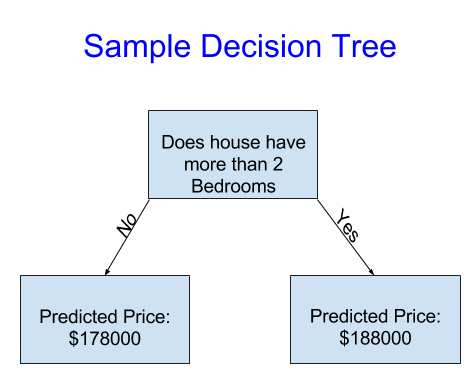

It divides houses into only two categories. The predicted price for any house under consideration is the historical average price of houses in the same category.

We use data to decide how to break the houses into two groups, and then again to determine the predicted price in each group. This step of capturing patterns from data is called fitting or training the model. The data used to fit the model is called the training data.

The details of how the model is fit (e.g. how to split up the data) is complex enough that we will save it for later. After the model has been fit, you can apply it to new data to predict prices of additional homes.

## Improving the Decision Tree
Which of the following two decision trees is more likely to result from fitting the real estate training data?
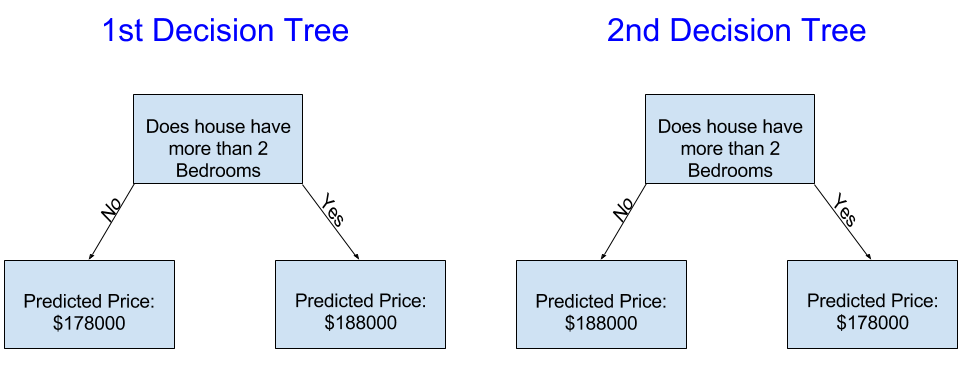

The decision tree on the left (Decision Tree 1) probably makes more sense, because it captures the reality that houses with more bedrooms tend to sell at higher prices than houses with fewer bedrooms. The biggest shortcoming of this model is that it doesn't capture most factors affecting home price, like number of bathrooms, lot size, location, etc.

You can capture more factors using a tree that has more "splits." These are called "deeper" trees. A decision tree that also considers the total size of each house's lot might look like this:
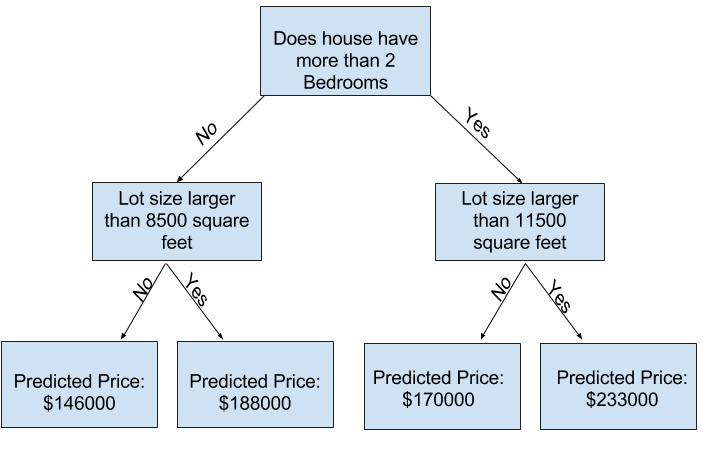

You predict the price of any house by tracing through the decision tree, always picking the path corresponding to that house's characteristics. The predicted price for the house is at the bottom of the tree. The point at the bottom where we make a prediction is called a leaf.

The splits and values at the leaves will be determined by the data, so it's time for you to check out the data you will be working with.

In [ ]:
# First, let's import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Next, load the dataset
df = pd.read_csv('data/melb_data.csv') # replace with your CSV's path

In [ ]:
# Print the first few rows of the dataset
df.head()

In [ ]:
# Print some descriptives and statistiscs
df.describe()

### Interpreting Data Description
The results show 8 numbers for each column in your original dataset. The first number, the count, shows how many rows have non-missing values.

Missing values arise for many reasons. For example, the size of the 2nd bedroom wouldn't be collected when surveying a 1 bedroom house. We'll come back to the topic of missing data.

The second value is the mean, which is the average. Under that, std is the standard deviation, which measures how numerically spread out the values are.

To interpret the min, 25%, 50%, 75% and max values, imagine sorting each column from lowest to highest value. The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number.

# Exercise 1 
### Selecting Data for Modeling
Your dataset had too many variables to wrap your head around, or even to print out nicely. How can you pare down this overwhelming amount of data to something you can understand?

We'll start by picking a few variables using our intuition. Later courses will show you statistical techniques to automatically prioritize variables.

To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the columns property of the DataFrame (the bottom line of code below).

In [ ]:
df.columns

# Exercise 1.1 Data exploration
### What is the pattern you want to find?
- Use the correlation matrix from the previous deepdive session
- Find the columns with the highest correlation with price (=features)
- Make a scatter plot for each feature

In [ ]:
columns_to_correlate = ['Price', '', ''] # TODO: fill in the chosen column names 
correlation_matrix = df[columns_to_correlate].corr()

print("Correlation matrix:")
print(correlation_matrix)

In [ ]:
# Choose the the highest correlation and make a scatter plot
FEATURE = 
# Scatter plot of Price vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df[FEATURE], alpha=0.2)
plt.title(f'Price vs {FEATURE}')
plt.xlabel(FEATURE)
plt.ylabel('Price')

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

# Exercise 1.2 Data selection
### You want to predict the price: Which features do select choose?
The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features.

In [ ]:
# Visually checking your data is an important part of a data scientist's job. 
# You'll frequently find surprises in the dataset that deserve further inspection.
features = ['FEATURE 1', 'FEATURE 2', 'FEATURE 3']
X = df[features]
X.head()

In [ ]:
prediction_target = '' # what is the target you want to predict?
y = df[prediction_target]
y.head()

# Exercise 1.3  Building Your Model
### Fitting the statistical formula

You will use the scikit-learn library to create your models. When coding, this library is written as sklearn, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames.

The steps to building and using a model are:

- Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
- Fit: Capture patterns from provided data. This is the heart of modeling.
- Predict: Just what it sounds like
- Evaluate: Determine how accurate the model's predictions are.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

We now have a fitted model that we can use to make predictions.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.

In [ ]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

### Model validation (prediction error)

 If you compare predicted and actual home values for 10,000 houses, you'll likely find mix of good and bad predictions. Looking through a list of 10,000 predicted and actual values would be pointless. We need to summarize this into a single metric.

There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). Let's break down this metric starting with the last word, error.

```
error = actual price - predicted price
```

So, if a house actually costs 150,000 and you predicted it would cost 100,000 the error is 50,000.

With the MAE metric, we take the absolute value of each error. This converts each error to a positive number. We then take the average of those absolute errors. This is our measure of model quality. In plain English, it can be said as:

*On average, our predictions are off by about X.*

In [ ]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

# Exercise 1.4  Optimizing Your Model
### What happens if you select different features in excercise 1.2?? Try it out
Try lowering the mean absolute error, once the error won't decrease anymore you have found the optimal features!

In [ ]:
features = ['FEATURE 1', 'FEATURE 2', 'FEATURE 3']
X = df[features]

# prediction_target stays the same 
y = df[prediction_target]

# Define model
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)


# How different are the results?
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)